In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Corey Schafer\EDA PROJECT Dataset\Supplement_Sales_Weekly_Expanded.csv")
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Date,Units Sold,Price,Revenue,Discount,Units Returned
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,0.124398,1.531478
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,0.190000,2.000000
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,0.250000,8.000000
std,NaN,12.396099,14.198309,2192.491946,0.071792,1.258479


In [9]:
df.describe(include = 'object')

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


In [10]:
daily_sales = df.groupby('Date').agg({
    'Revenue' : 'sum',
    'Units Sold' : 'sum',
    'Units Returned' : 'sum'
})

In [11]:
daily_sales.reset_index().head()

,Date,Revenue,Units Sold,Units Returned
0,2020-01-06,71848.56,2406,19
1,2020-01-13,72416.18,2374,27
2,2020-01-20,76152.42,2370,26
3,2020-01-27,70306.73,2397,29
4,2020-02-03,98011.64,2384,34


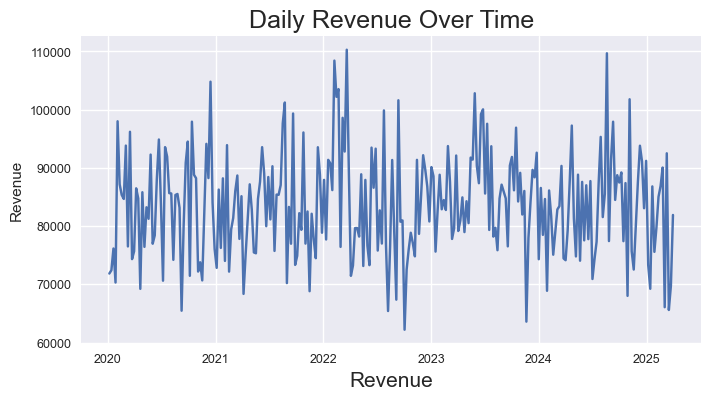

In [12]:
plt.style.use("seaborn-v0_8")

fig = plt.figure(figsize=(8, 4))
sns.lineplot(x = 'Date', y = 'Revenue', data = daily_sales)

plt.title('Daily Revenue Over Time', fontsize = 18)
plt.xlabel("Date(Year)", fontsize = 15)
plt.xlabel("Revenue", fontsize = 15)

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

In [13]:
Category_Revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending = False)

In [14]:
Category_Revenue

Category
Vitamin        4300224.68
Mineral        4276107.99
Performance    2909702.18
Protein        2855492.09
Amino Acid     1464819.63
Omega          1451065.87
Fat Burner     1440900.05
Hydration      1411951.38
Herbal         1405700.79
Sleep Aid      1397315.79
Name: Revenue, dtype: float64

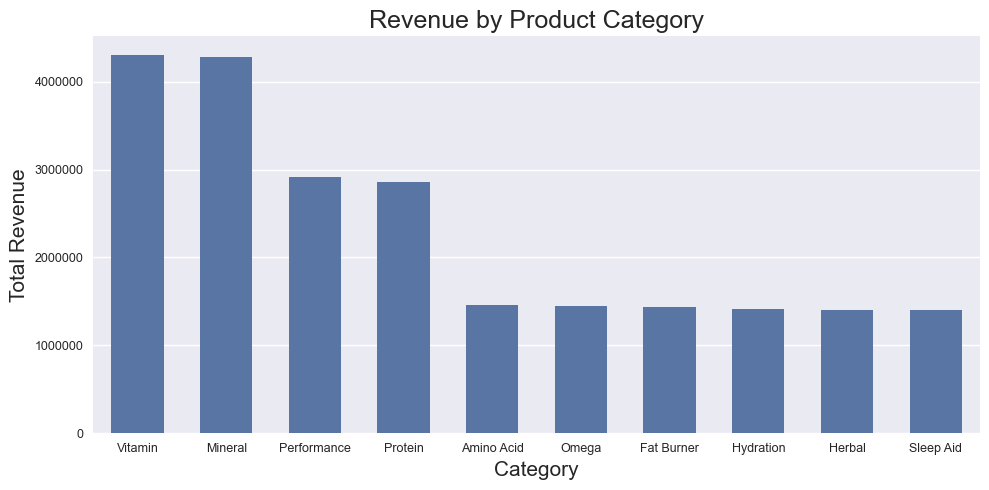

In [15]:
plt.style.use("seaborn-v0_8")
fig = plt.figure(figsize = (10, 5))
sns.barplot(x = Category_Revenue.index, y = Category_Revenue.values, width = 0.59)

plt.title('Revenue by Product Category', fontsize = 18)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Total Revenue', fontsize = 15)

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [16]:
loc_platform = df.groupby(['Location', 'Platform'])['Revenue'].sum().unstack().fillna(0).reset_index()

In [17]:
loc_platform

Platform,Location,Amazon,Walmart,iHerb
0,Canada,2613844.28,2518639.07,2716096.38
1,UK,2442671.23,2637066.25,2624222.86
2,USA,2612936.27,2232862.30,2514941.81


In [18]:
loc_platform['Location']

0    Canada
1        UK
2       USA
Name: Location, dtype: object

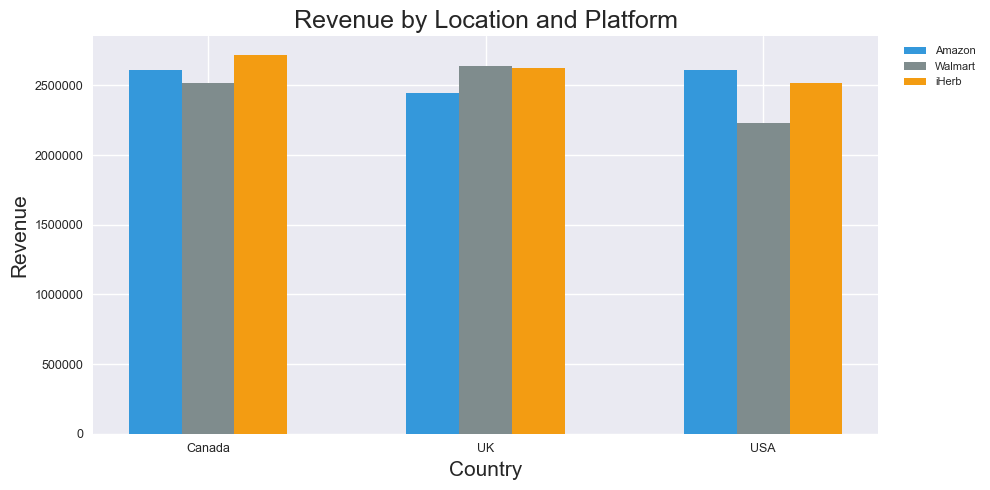

In [19]:
plt.style.use("seaborn-v0_8")

x = np.arange(len(loc_platform["Location"]))
width = 0.19                      

plt.figure(figsize=(10, 5))
plt.bar(x - width, loc_platform["Amazon"],  width, color = '#3498DB' , label="Amazon")
plt.bar(x, loc_platform["Walmart"], width, color = '#7F8C8D', label="Walmart")
plt.bar(x + width, loc_platform["iHerb"], width, color = '#F39C12', label="iHerb")

plt.xlabel("Country", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)
plt.title("Revenue by Location and Platform", fontsize = 18)

plt.xticks(x, loc_platform["Location"], fontsize = 9)
plt.yticks(fontsize = 9)
plt.ticklabel_format(style='plain', axis='y')

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize = 8)
plt.tight_layout()

plt.show()


In [20]:
top_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending = False).head(10)

In [21]:
top_products

Product Name
Biotin               1486798.62
Zinc                 1482546.95
Pre-Workout          1477183.78
BCAA                 1464819.63
Fish Oil             1451065.87
Green Tea Extract    1440900.05
Collagen Peptides    1433297.24
Creatine             1432518.40
Iron Supplement      1431582.41
Whey Protein         1422194.85
Name: Revenue, dtype: float64

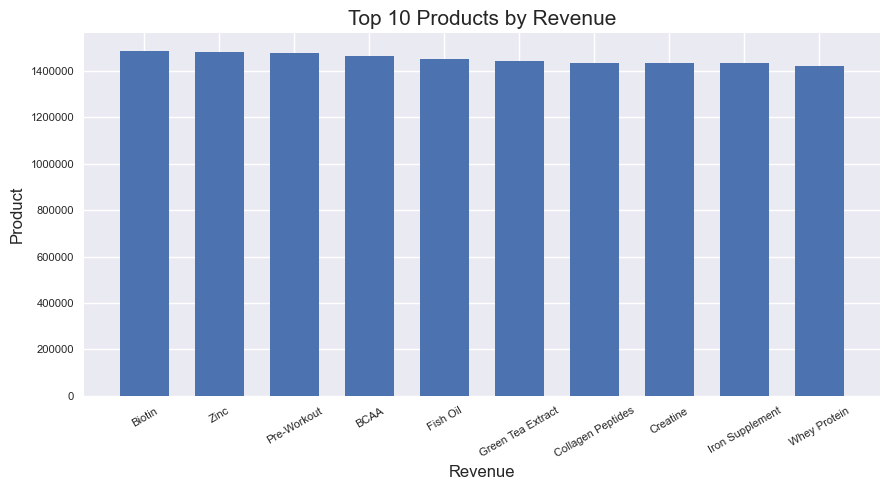

In [22]:
plt.style.use("seaborn-v0_8")

plt.figure(figsize=(9, 5))
plt.bar(top_products.index, top_products.values, width = 0.65)

plt.title("Top 10 Products by Revenue", fontsize=15)
plt.xlabel("Revenue", fontsize = 12)
plt.ylabel("Product", fontsize = 12)

plt.xticks(rotation = 30, fontsize = 8)
plt.yticks(fontsize = 8)

plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [23]:
df['Return Rate'] = df['Units Returned'] / df['Units Sold']

In [24]:
Category_Return = df.groupby('Category')['Return Rate'].mean().sort_values(ascending = False)

In [25]:
Category_Return

Category
Hydration      0.010746
Vitamin        0.010475
Amino Acid     0.010355
Fat Burner     0.010229
Performance    0.010207
Protein        0.010203
Mineral        0.010079
Omega          0.009870
Sleep Aid      0.009860
Herbal         0.009433
Name: Return Rate, dtype: float64

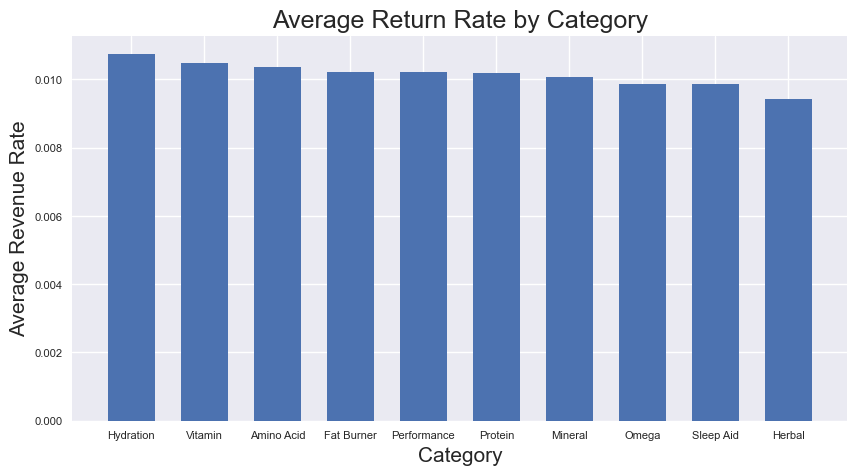

In [26]:
plt.style.use("seaborn-v0_8")

plt.figure(figsize=(10, 5))

plt.bar(Category_Return.index, Category_Return.values, width = 0.65)

plt.title('Average Return Rate by Category', fontsize = 18)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Average Revenue Rate', fontsize = 15)

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.show()

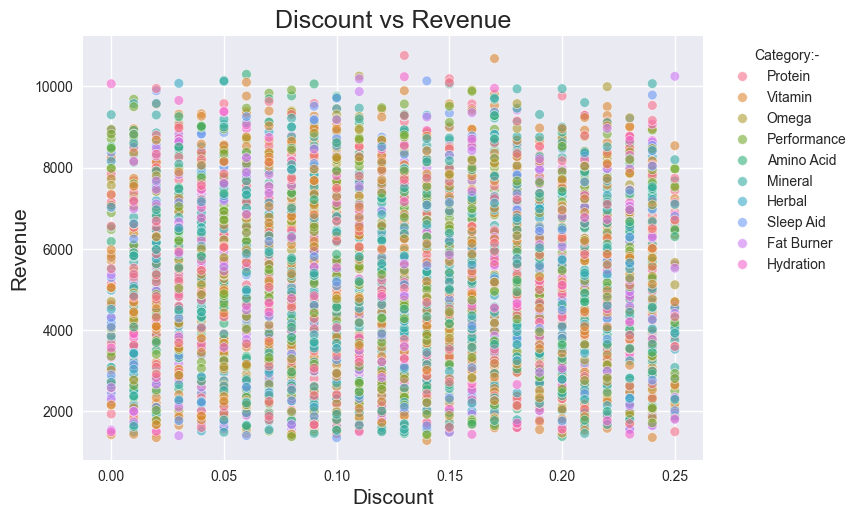

In [27]:
plt.style.use("seaborn-v0_8")

sns.scatterplot(x = 'Discount', y = 'Revenue', data = df, hue = 'Category', alpha = 0.6)

plt.title('Discount vs Revenue', fontsize = 18)
plt.xlabel('Discount', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.legend(title='Category:-', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [28]:
corr = df[['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']].corr()

In [29]:
corr

,Units Sold,Price,Revenue,Discount,Units Returned
Units Sold,1.000000,0.013749,0.210462,-0.010435,0.116523
Price,0.013749,1.000000,0.977198,-0.008668,-0.010410
Revenue,0.210462,0.977198,1.000000,-0.012531,0.012432
Discount,-0.010435,-0.008668,-0.012531,1.000000,0.004276
Units Returned,0.116523,-0.010410,0.012432,0.004276,1.000000


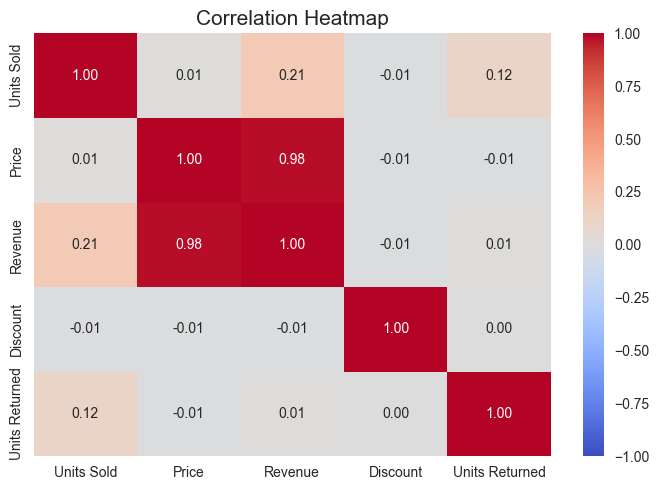

In [30]:
plt.figure(figsize=(7,5))

sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", vmin = -1, vmax = 1, center = 0)

plt.title("Correlation Heatmap", fontsize = 15)

plt.tight_layout()
plt.show()

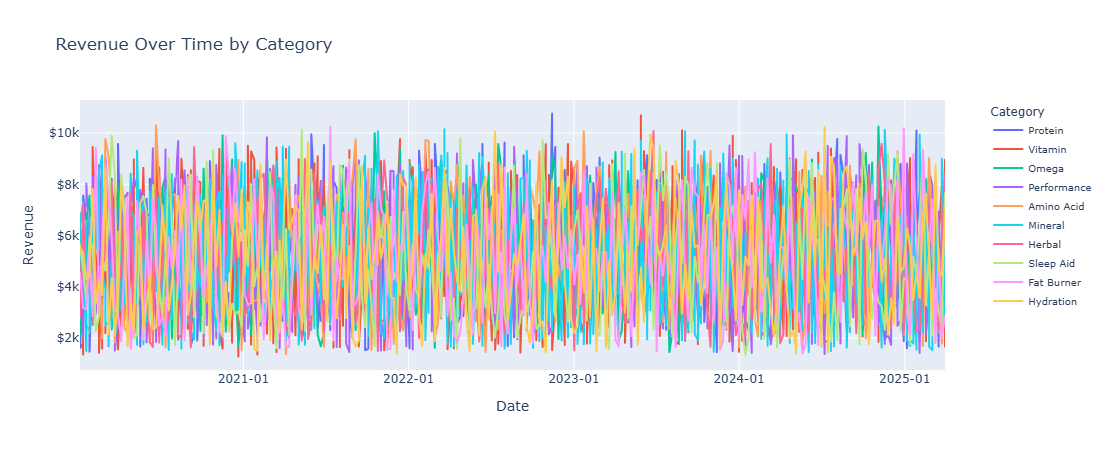

In [31]:
fig = px.line(df, x = 'Date', y = 'Revenue', color = 'Category', title = 'Revenue Over Time by Category')

fig.update_layout(legend = dict(x = 1.05, y = 1, traceorder = "normal",
        title  = "Category", font = dict(size = 10)),
        width  = 1100,
        height = 450,
        yaxis  = dict(tickprefix = "$"), 
        xaxis  = dict(tickformat = "%Y-%m"))

fig.show()

In [32]:
df['Monthly'] = df['Date'].dt.to_period('M')

In [33]:
monthly = df.groupby('Monthly').agg({
    'Revenue' : 'sum',
    'Units Sold' : 'sum',
    'Discount' : 'mean',
    'Units Returned' : 'sum'
}).reset_index()

In [34]:
monthly

,Monthly,Revenue,Units Sold,Discount,Units Returned
0,2020-01,290723.89,9547,0.120313,101
1,2020-02,355213.26,9493,0.128125,91
2,2020-03,416547.17,12145,0.111375,123
3,2020-04,326287.92,9605,0.138281,91
4,2020-05,333210.99,9557,0.119375,90
...,...,...,...,...,...
58,2024-11,329894.33,9838,0.117813,106
59,2024-12,446728.99,12042,0.127125,99
60,2025-01,304965.15,9617,0.125156,92
61,2025-02,341768.25,9542,0.128125,103


In [35]:
monthly['Monthly'] = monthly['Monthly'].astype(str)

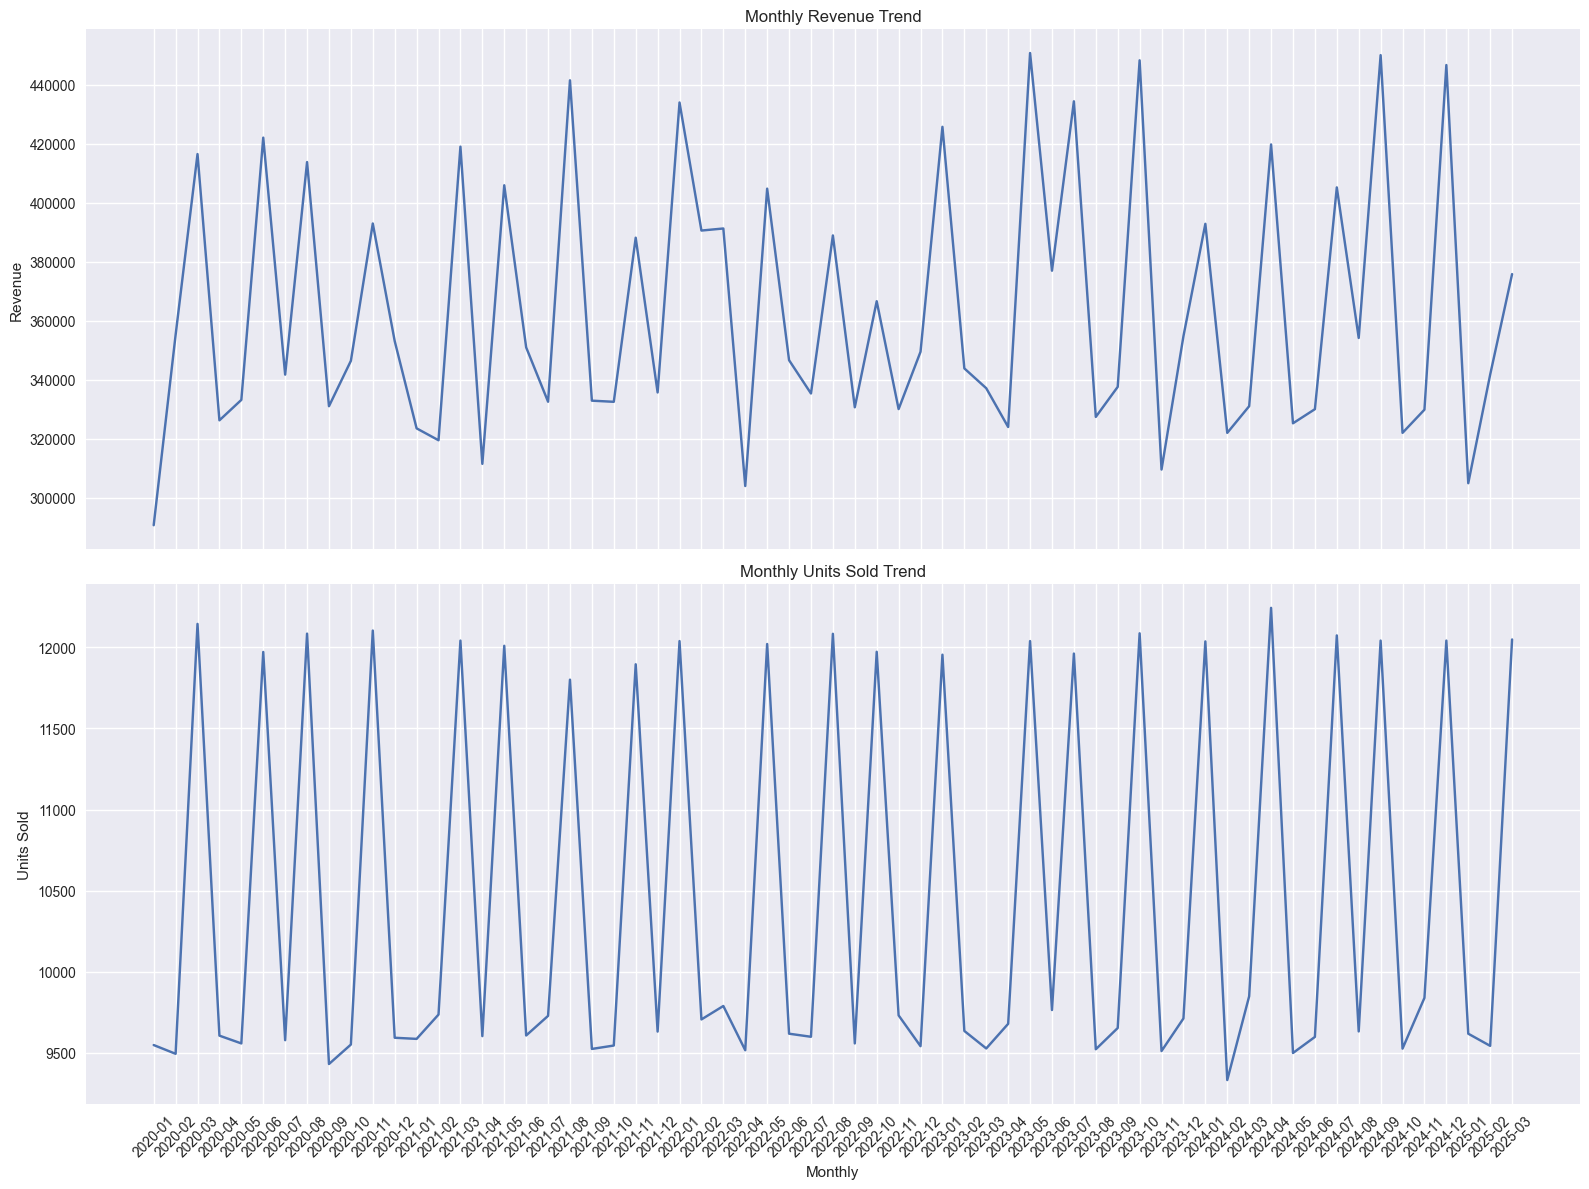

In [36]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize = (16, 12))

sns.lineplot(data=monthly, x="Monthly", y="Revenue", ax=axes[0])
axes[0].set_title("Monthly Revenue Trend")
axes[0].tick_params(axis="x", rotation=45)

sns.lineplot(data=monthly, x="Monthly", y="Units Sold", ax=axes[1])
axes[1].set_title("Monthly Units Sold Trend")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()

plt.show()


In [37]:
df['Net Revenue'] = df['Revenue'] - (df['Units Returned']* df['Price'])

In [38]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Return Rate,Monthly,Net Revenue
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,0.013986,2020-01,4509.18
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,0.000000,2020-01,5908.89
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,0.000000,2020-01,2078.51
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,0.000000,2020-01,2249.80
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,0.019108,2020-01,5462.38


In [39]:
category_profit = df.groupby('Category')['Net Revenue'].sum().sort_values(ascending = False)

In [40]:
category_profit

Category
Vitamin        4255337.22
Mineral        4233108.50
Performance    2879997.43
Protein        2827040.48
Amino Acid     1449514.18
Omega          1436916.36
Fat Burner     1426130.43
Hydration      1396778.95
Herbal         1392349.37
Sleep Aid      1383401.64
Name: Net Revenue, dtype: float64

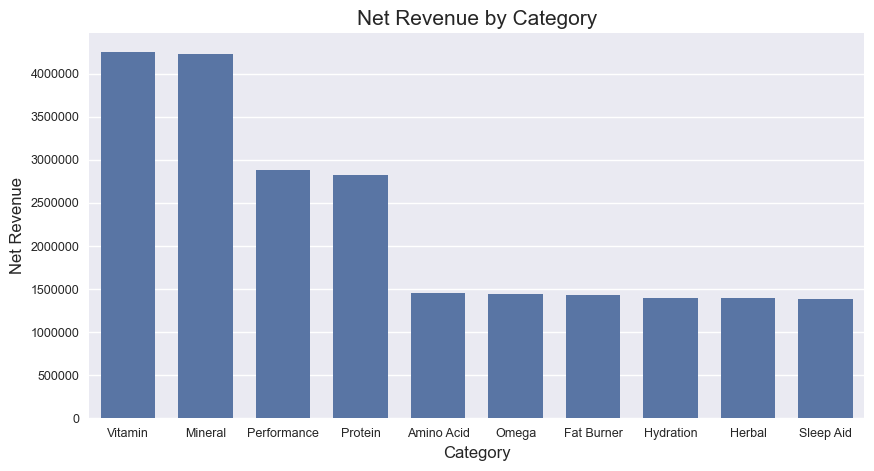

In [41]:
plt.style.use("seaborn-v0_8")
fig = plt.figure(figsize = (10, 5))

sns.barplot(x = category_profit.index, y = category_profit.values, width = 0.7)

plt.title('Net Revenue by Category',  fontsize = 15)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Net Revenue',  fontsize = 12)

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.ticklabel_format(style='plain', axis='y')

plt.show()